1\. **Pandas DataFrame**

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every `x` BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If haven't downloaded it yet, please get the data file with wget
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [1]:
import pandas as pd
import numpy as np
import random

N = random.randint(10000, 1310720)
file_name = "data/data_000637.txt" # total no. of rows = 1310720
df = pd.read_csv(file_name, nrows=N)
print("Number of rows: ", len(df.index)) 
df.head(7)

Number of rows:  197793


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
5,1,0,63,3869200167,2762,4
6,1,0,61,3869200167,2772,14


2\. Estimate the number of BX in a ORBIT (the value `x`).

*Hint*: check when the BX counter reaches the maximum value before being reset to 0.

In [2]:
x = df['BX_COUNTER'].max() + 1
x

3564

3\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition, and convert the new column to a Time Series.

In [13]:
df['ABSOLUTE_TIME'] = pd.Series(df['ORBIT_CNT']*x*25+ df['BX_COUNTER']*25 + df['TDC_MEAS']*25/30)

4\. Find out the duration of the data taking in hours, minutes and seconds, by using the features of the Time Series. Perform this check reading the whole dataset.

In [ ]:
import datetime as dt

date = dt.date.today()
print("Today's date:", date)

# specify year, month, day, hour, minutes, seconds, and microseconds
date = dt.datetime(2020, 11, 12, 10, 45, 10, 15)
print("Date and time:", date)
print("Month:", date.month, "and minutes:", date.minute)
tstamp = pd.Timestamp(date)
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print("Timestamp:", tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print("Time:", ts, ", timestamp:", ts.value, ", type:", type(ts))

ts = pd.to_datetime('12-11-2010 10:39', format='%d-%m-%Y %H:%M')
print("Time:", ts, ", timestamp:", ts.value, ", type:", type(ts))

5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [4]:
df.groupby(['TDC_CHANNEL'])['TDC_CHANNEL'].count().sort_values(ascending=False).head(3)

TDC_CHANNEL
139    9659
64     5825
63     5702
Name: TDC_CHANNEL, dtype: int64

6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit).

7\. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [5]:
unique_orbits_channel_139 = np.unique(df[df['TDC_CHANNEL'] == 139]['ORBIT_CNT'])
print("There are "+str(len(unique_orbits_channel_139))+" unique orbits with at least one measurement from TDC_CHANNEL=139")

There are 1152 unique orbits with at least one measurement from TDC_CHANNEL=139


8\. Create two Series (one for each FPGA) that have the TDC channel as index, and the number of counts for the corresponding TDC channel as values.

In [12]:
df_fpga_0 = pd.Series(df[df['FPGA']==0].loc[:,'TDC_CHANNEL'].value_counts()).sort_index()
df_fpga_1 = pd.Series(df[df['FPGA']==1].loc[:,'TDC_CHANNEL'].value_counts()).sort_index()
#df['TDC_CHANNEL'].value_counts()
df_fpga_0

1        183
2        231
3        223
4        321
5        229
       ...  
129        1
130        7
137        5
138        5
139    11538
Name: TDC_CHANNEL, Length: 122, dtype: int64

9\. **Optional:** Create two histograms (one for each FPGA) that show the number of counts for each TDC channel.

Text(0.5, 1.0, 'FPGA = 1')

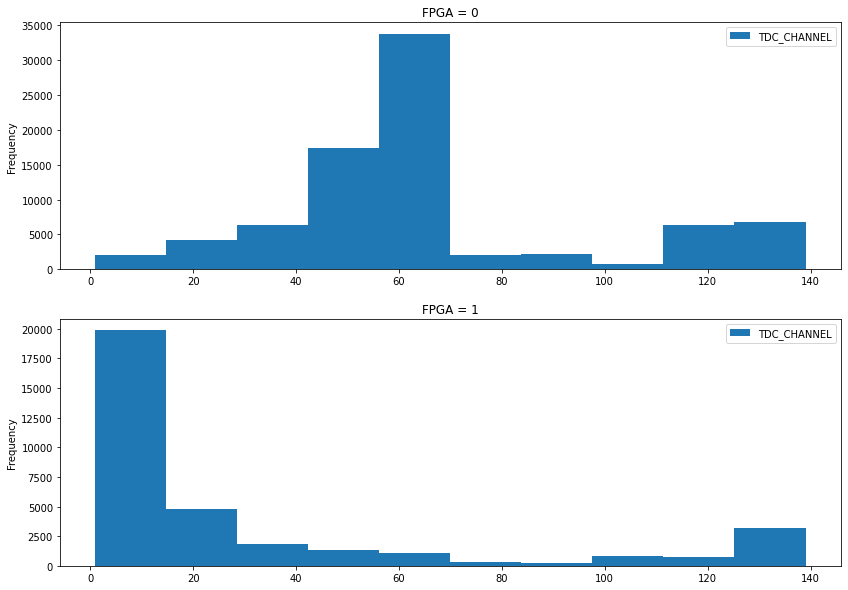

In [7]:
ax = df.plot.hist(column=["TDC_CHANNEL"], by="FPGA", figsize=(14, 10))
ax[0].set_title("FPGA = 0")
ax[1].set_title("FPGA = 1")